In [5]:
import os
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_vertexai import VertexAI
from langchain_google_genai import GoogleGenerativeAI
from langchain_openai import OpenAI
import networkx as nx
#from langchain.chains import GraphQAChain
from langchain_classic.chains import GraphQAChain
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

llm = OpenAI(model='gpt-3.5-turbo-instruct',api_key=OPENAI_API_KEY)

In [6]:
text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris. 
"""


documents = [Document(page_content=text)]
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)



llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Country", "Organization"],
    allowed_relationships=["NATIONALITY", "LOCATED_IN", "WORKED_AT", "SPOUSE"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
    documents
)
print("graph_documents_filtered", graph_documents_filtered)


df = pd.DataFrame(columns=["node1", "node2", "relation"])

for edge in graph_documents[0].relationships:
    df = pd.concat([df, pd.DataFrame([{'node1': edge.source.id, 'node2': edge.target.id, 'relation': edge.type}])], ignore_index=True)

print("Extracted Relationships DataFrame:", df)

graph_documents_filtered [GraphDocument(nodes=[Node(id='French', type='Country', properties={}), Node(id='Marie Curie', type='Person', properties={}), Node(id='Polish', type='Country', properties={}), Node(id='Pierre Curie', type='Person', properties={})], relationships=[Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Polish', type='Country', properties={}), type='NATIONALITY', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='French', type='Country', properties={}), type='NATIONALITY', properties={}), Relationship(source=Node(id='Marie Curie', type='Person', properties={}), target=Node(id='Pierre Curie', type='Person', properties={}), type='SPOUSE', properties={})], source=Document(metadata={}, page_content='\nMarie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.\nShe was the first woman to win a Nobel Priz

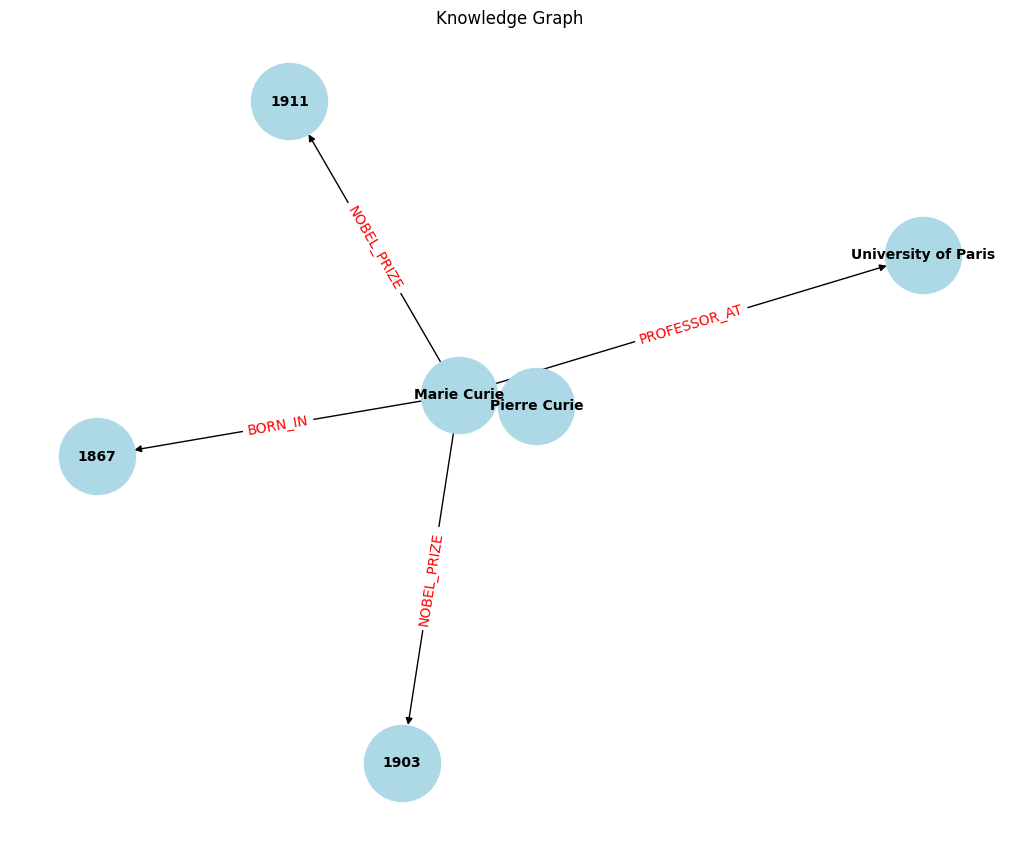

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

#create a directed graph
G = nx.DiGraph()

#add edges to the graph
for index, row in df.iterrows():
    G.add_edge(row['node1'], row['node2'], relation=row['relation'])



#draw the graph
pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'relation')

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.title("Knowledge Graph")
plt.show()